#📌 Extracción

In [1]:
import pandas as pd
import numpy as np

# --- FASE 1: CARGA DE DATOS ---
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
print("Cargando datos desde la API...")
df = pd.read_json(url_api)

Cargando datos desde la API...


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
# --- FASE 2: TRANSFORMACIÓN Y LIMPIEZA (ETL) ---

# 1. Aplanar (desempaquetar) las columnas anidadas
columnas_anidadas = ['customer', 'phone', 'internet', 'account']

for col in columnas_anidadas:
    # Convertimos la columna de diccionarios en un DataFrame nuevo
    df_aplanado = pd.json_normalize(df[col].tolist())
    # Unimos el nuevo DataFrame al original y eliminamos la columna anidada
    df = pd.concat([df.drop(columns=[col]), df_aplanado], axis=1)

print("\n¡Datos desempaquetados! Nuevas columnas disponibles:")
print(df.columns.tolist())

# 2. Corregir inconsistencias en 'Charges.Total'
# A veces viene con espacios vacíos (' '), los convertimos a nulos (NaN) y los eliminamos
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.dropna(subset=['Charges.Total'], inplace=True)

# 3. Crear columna Cuentas_Diarias
df['Cuentas_Diarias'] = round(df['Charges.Monthly'] / 30, 2)

# 4. Estandarización de variables categóricas a binarias (1 y 0)
mapeo_binario = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

columnas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'gender'
]

for col in columnas_binarias:
    # Verificamos que la columna exista antes de mapear para evitar errores
    if col in df.columns:
        df[col] = df[col].map(mapeo_binario)

print("\nLimpieza y transformación completadas. Dimensiones del dataset final:", df.shape)
display(df.head())


¡Datos desempaquetados! Nuevas columnas disponibles:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Limpieza y transformación completadas. Dimensiones del dataset final: (7256, 22)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

Estadísticas descriptivas de variables numéricas:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.505650,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158467
std,0.441782,0.500003,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004282
min,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.180000
50%,0.000000,1.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.000000,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


/tmp/ipython-input-3379368846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


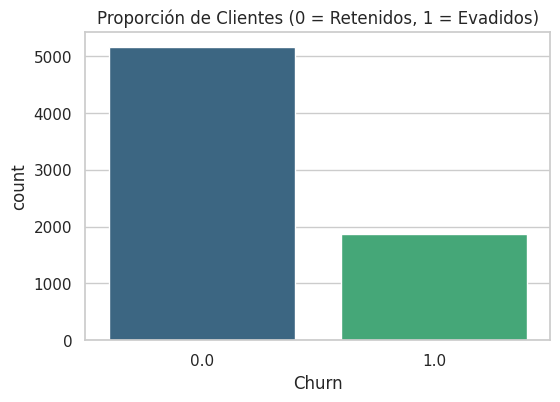

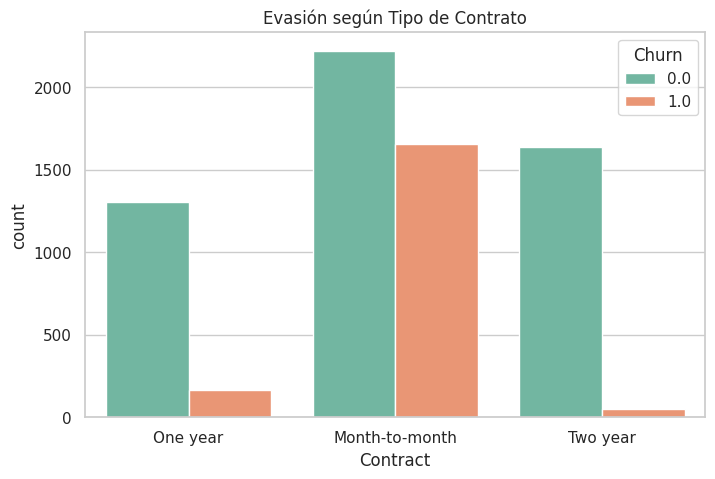

/tmp/ipython-input-3379368846.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df, palette='coolwarm')


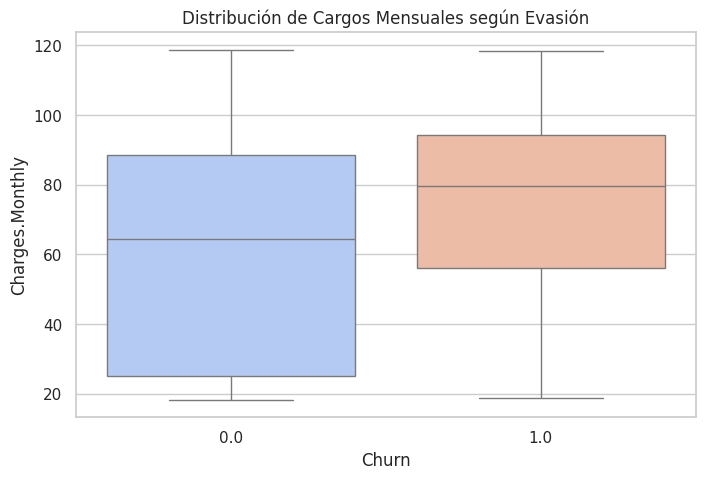

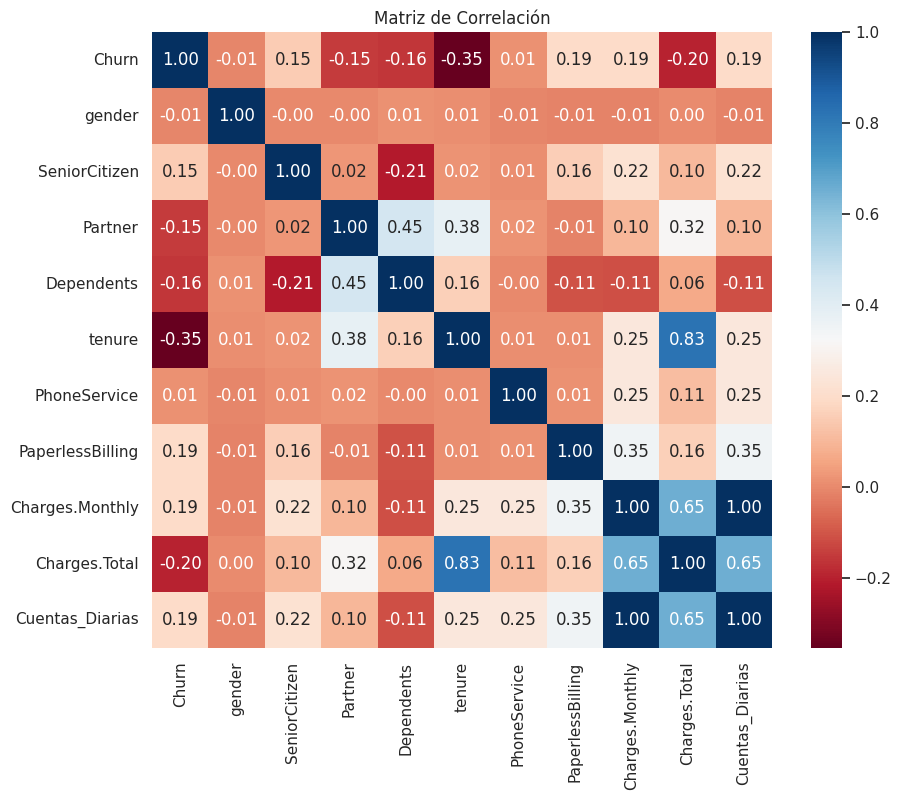

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")

# 1. Análisis descriptivo
print("Estadísticas descriptivas de variables numéricas:")
display(df.describe())

# 2. Proporción de Churn (Evasión)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Proporción de Clientes (0 = Retenidos, 1 = Evadidos)')
plt.show()

# 3. Churn según variable categórica (Ejemplo: Tipo de Contrato)
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Evasión según Tipo de Contrato')
plt.show()

# 4. Churn según variable numérica (Ejemplo: Cargos Mensuales)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df, palette='coolwarm')
plt.title('Distribución de Cargos Mensuales según Evasión')
plt.show()

# 5. OPCIONAL: Matriz de Correlación
plt.figure(figsize=(10, 8))
# Seleccionamos solo las columnas numéricas para la correlación
columnas_numericas = df.select_dtypes(include=[np.number])
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#📄Informe final

# Informe de Análisis de Evasión de Clientes - Telecom X

🔹 Introducción
El objetivo principal de este análisis es explicar el problema de evasión de clientes dentro de Telecom X. Actualmente, la empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes. A través del análisis de datos demográficos y de los servicios contratados, buscamos identificar patrones que permitan tomar decisiones estratégicas para mejorar la retención.

🔹 Limpieza y Tratamiento de Datos
Para preparar la información, se describen los siguientes pasos realizados para importar, limpiar y procesar los datos:

    Extracción y Aplanamiento: Se cargaron los datos en formato JSON
    desde la API y se desempaquetaron las columnas anidadas (como los
    detalles de cuenta y servicios) para integrarlas en un único
    DataFrame de Pandas.

    Limpieza de Inconsistencias: Se prestó especial atención a
    valores ausentes, duplicados y errores de formato.
    Específicamente, se corrigió la columna de cargos totales
    (Charges.Total), convirtiendo los espacios en blanco a valores
    numéricos nulos y eliminando dichas filas.

    Ingeniería de Características: Se procedió a crear la columna
    "Cuentas_Diarias" dividiendo la facturación mensual.

    Estandarización: Se decidió convertir valores textuales como "Sí"
    y "No" en valores binarios (1 y 0). Esto facilitó el
    procesamiento matemático y la posterior matriz de correlación.

🔹 Análisis Exploratorio de Datos
Durante esta fase, se presentan los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones:

    Distribución del Churn: El análisis reveló la proporción exacta
    de clientes que permanecieron en la empresa y los que se dieron
    de baja.

    Variables Categóricas (Contratos y Pagos): Al observar los
    perfiles de los clientes, descubrimos que el tipo de contrato
    tiene una relación directa con la tasa de cancelación. Los
    clientes con contratos de mes a mes (Month-to-Month) presentan
    una tendencia significativamente mayor a abandonar el servicio en
    comparación con aquellos que tienen contratos anuales o bianuales.

    Variables Numéricas (Cargos): Se exploró cómo las variables
    numéricas se distribuyen entre los clientes que cancelaron.
    Existe una concentración de evasión en clientes que tienen cargos
    mensuales más altos, lo que indica que el precio frente al valor
    percibido es un punto de fricción.

🔹 Conclusiones e Insights
En resumen, estos son los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión:

    El compromiso a corto plazo es el mayor riesgo: Los contratos
    mensuales son el principal foco de evasión. Los clientes no
    sienten una barrera de salida.

    Sensibilidad al precio: Los clientes que pagan más mensualmente
    son más propensos a irse, especialmente si no tienen servicios
    que los "aten" al ecosistema de la empresa (como soporte técnico
    o seguridad en línea).

    Los primeros meses son críticos: Generalmente, los clientes con
    menor tiempo de permanencia (tenure) son los que más rápido
    abandonan la compañía.

🔹 Recomendaciones
Con base en nuestro análisis, se ofrecen las siguientes sugerencias estratégicas:

    Incentivar contratos a largo plazo: Ofrecer descuentos agresivos,
    beneficios adicionales o mejoras de servicio (como Streaming
    gratuito por 3 meses) a los clientes que decidan cambiar su
    contrato mensual por uno de 1 o 2 años.

    Programas de fidelización temprana: Implementar un seguimiento
    proactivo y soporte técnico prioritario durante los primeros 3 a
    6 meses del ciclo de vida del cliente, ya que es el periodo de
    mayor riesgo de abandono.

    Revisión de la estructura de precios: Analizar los planes de alto
    costo mensual. Si un cliente está pagando tarifas elevadas, se le
    debe contactar proactivamente para ofrecerle un "empaquetado"
    (bundle) que le dé más valor por su dinero, reduciendo su
    intención de buscar alternativas en la competencia.